In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("List of Countries by Sugarcane Production.csv")

In [3]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [4]:
df.shape

(103, 7)

## Data Cleaning

In [5]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [6]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,"3668,531",10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,"1264,303",1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [7]:
df.rename(columns={"Production (Tons)": "Production(Tons)"},inplace=True)
df.rename(columns={"Production per Person (Kg)":"Production_per_Person(Kg)"},inplace=True)
df.rename(columns={"Acreage (Hectare)":"Acreage(Hectare)"},inplace=True)
df.rename(columns={"Yield (Kg / Hectare)":"Yield(Kg/Hectare)"},inplace=True)

In [8]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,"3668,531",10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,"1264,303",1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [9]:
df.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [10]:
df[df["Acreage(Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [11]:
df=df.dropna().reset_index()

In [12]:
df.head()

,index,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,0,Brazil,South America,768678382,"3668,531",10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,"1264,303",1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [13]:
df.drop(["index","Unnamed: 0"],axis=1,inplace=True)

In [14]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,"3668,531",10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,"1264,303",1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [15]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [16]:
df["Production(Tons)"]=df["Production(Tons)"].astype(float)
df["Acreage(Hectare)"]=df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"]=df["Yield(Kg/Hectare)"].astype(float)

In [17]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)     object
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [18]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

## Univariate Analysis

In [19]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,"3668,531",10226205.0,75167.5
1,India,Asia,348448000.0,260721,4950000.0,70393.5
2,China,Asia,123059739.0,88287,1675215.0,73459.1
3,Thailand,Asia,87468496.0,"1264,303",1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219,1130820.0,57879.0


How many countries product sugarcane from each continent

In [20]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

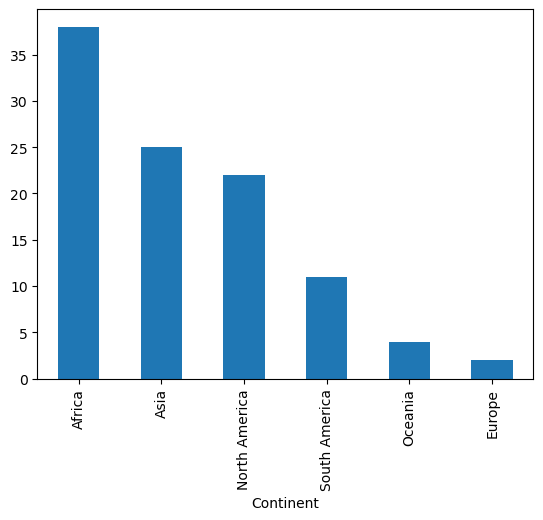

In [21]:
df["Continent"].value_counts().plot(kind="bar")

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

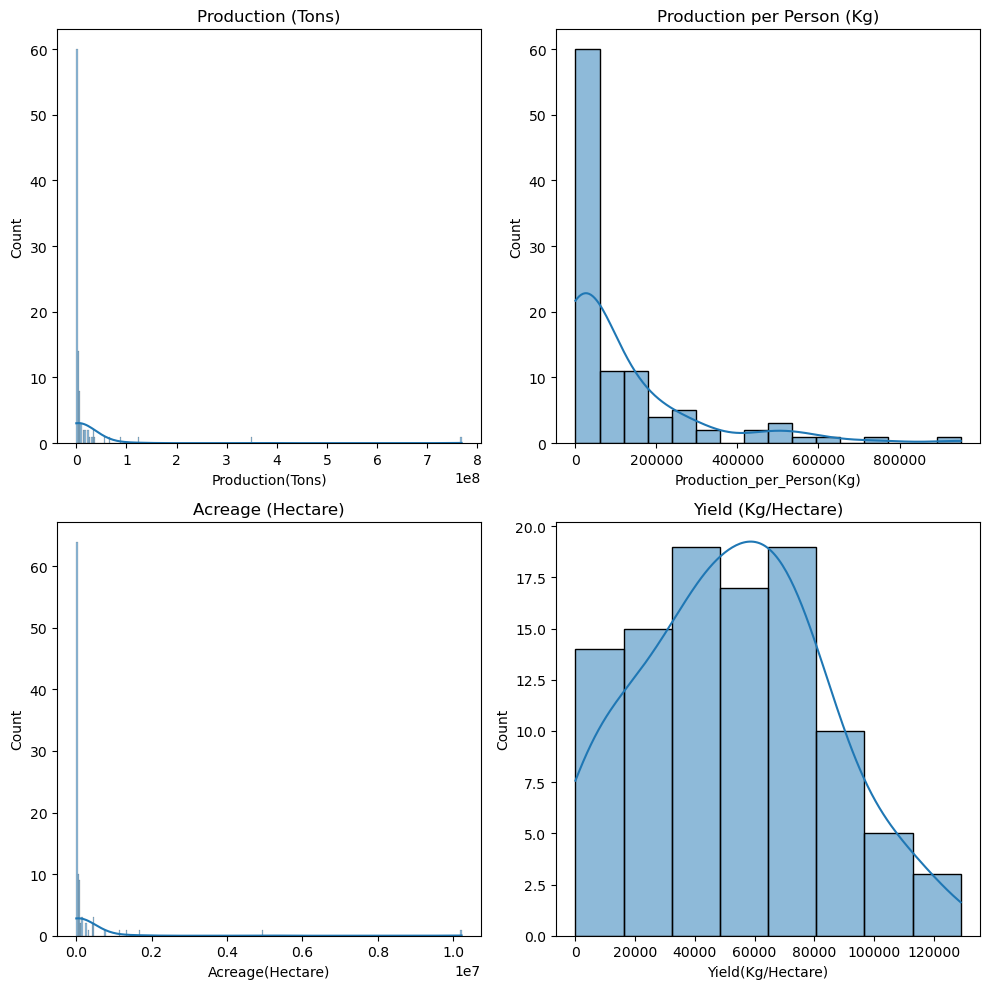

In [22]:
# Replace commas with dots
df = df.replace(',', '.', regex=True)

# Convert columns to float, coercing errors
columns_to_convert = ["Production(Tons)", "Production_per_Person(Kg)", "Acreage(Hectare)", "Yield(Kg/Hectare)"]
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN values that resulted from coercion
df = df.dropna(subset=columns_to_convert)

# Plotting
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
sns.histplot(df["Production(Tons)"], kde=True)
plt.title('Production (Tons)')

plt.subplot(2, 2, 2)
sns.histplot(df["Production_per_Person(Kg)"], kde=True)
plt.title('Production per Person (Kg)')

plt.subplot(2, 2, 3)
sns.histplot(df["Acreage(Hectare)"], kde=True)
plt.title('Acreage (Hectare)')

plt.subplot(2, 2, 4)
sns.histplot(df["Yield(Kg/Hectare)"], kde=True)
plt.title('Yield (Kg/Hectare)')

plt.tight_layout()
plt.show()

In [23]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


Text(0.5, 1.0, 'Yield (Kg/Hectare)')

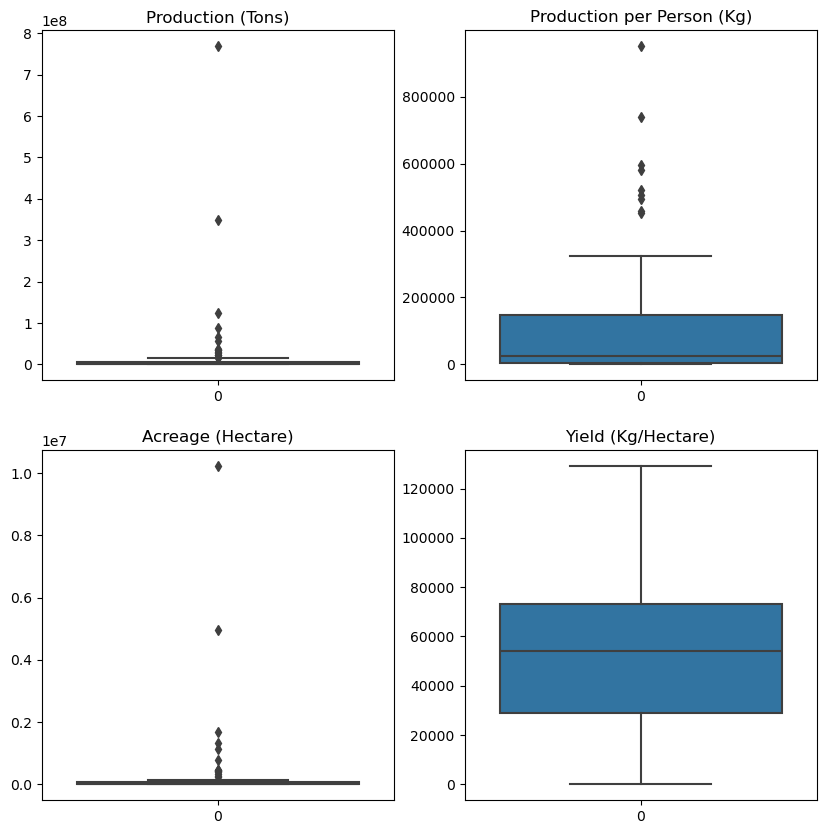

In [24]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
sns.boxplot(df["Production(Tons)"])
plt.title('Production (Tons)')

plt.subplot(2, 2, 2)
sns.boxplot(df["Production_per_Person(Kg)"])
plt.title('Production per Person (Kg)')

plt.subplot(2, 2, 3)
sns.boxplot(df["Acreage(Hectare)"])
plt.title('Acreage (Hectare)')

plt.subplot(2, 2, 4)
sns.boxplot(df["Yield(Kg/Hectare)"])
plt.title('Yield (Kg/Hectare)')

In [25]:
df.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


## Checking Outlier

In [26]:
min_limit=df["Yield(Kg/Hectare)"].quantile(0.01)
max_limit=df["Yield(Kg/Hectare)"].quantile(0.99)

In [27]:
df[(df["Production_per_Person(Kg)"]>max_limit) | (df["Production_per_Person(Kg)"]<min_limit)]

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
1,India,Asia,348448000.0,260721.0,4950000.0,70393.5
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0
5,Mexico,North America,56446821.0,452524.0,781054.0,7227.0
6,Colombia,South America,36951213.0,740075.0,416626.0,88691.5
11,Philippines,Asia,22370546.0,210232.0,410104.0,54548.5
12,Argentina,South America,21990823.0,494237.0,331699.0,66297.5
14,Vietnam,Asia,16313145.0,172334.0,256322.0,63643.2
15,Egypt,Africa,15760418.0,161651.0,137011.0,115030.6
16,South Africa,Africa,15074610.0,261143.0,246937.0,61046.3
17,Myanmar,Asia,10437058.0,193771.0,16365.0,63776.7


## Bivariate Analysis

In [28]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## Which country produces maximum sugarcane?

In [29]:
df_new=df[["Country","Production(Tons)"]].set_index("Country")

In [30]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [31]:
df_new["Production(Tons)_percent"]=df_new["Production(Tons)"]*100/df_new["Production(Tons)"].sum()

In [32]:
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

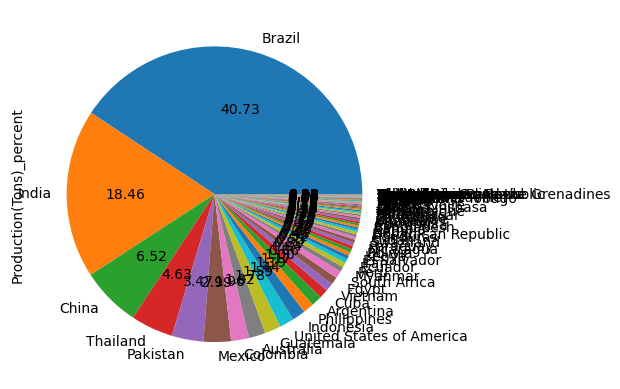

In [33]:
df_new["Production(Tons)_percent"].plot(kind="pie",autopct='%.2f')

<Axes: xlabel='Country'>

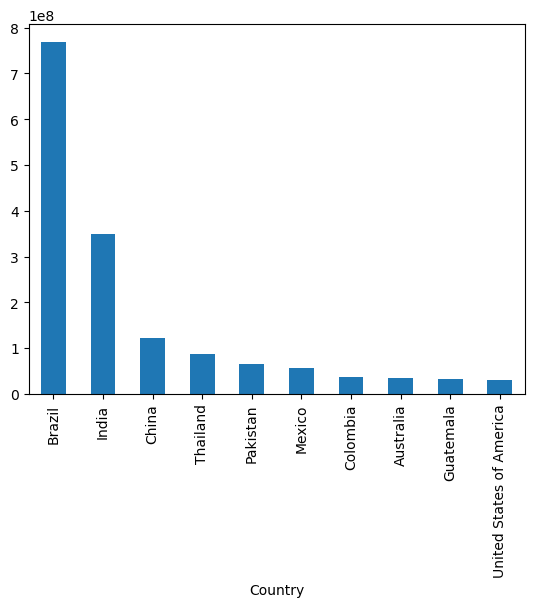

In [34]:
df_new["Production(Tons)"].head(10).plot(kind='bar')

<Axes: xlabel='Country', ylabel='Production(Tons)'>

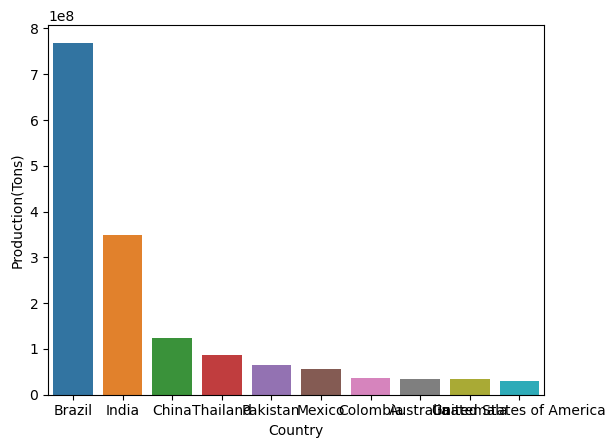

In [35]:
ax=sns.barplot(data=df.head(10),x='Country',y="Production(Tons)")
ax

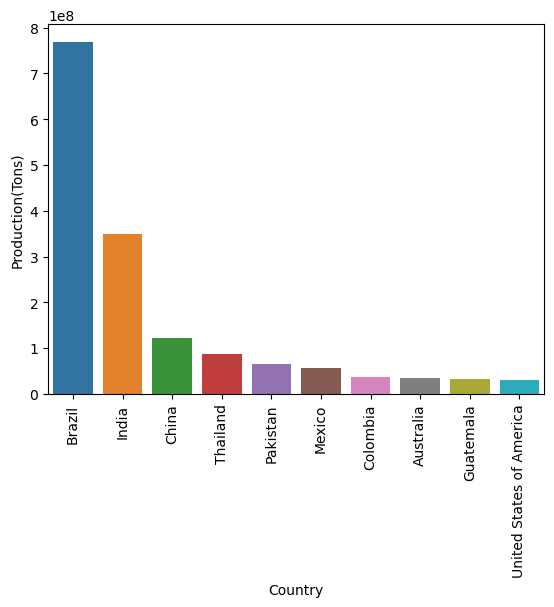

In [36]:
ax=sns.barplot(data=df.head(10),x='Country',y="Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## Which country has highest land

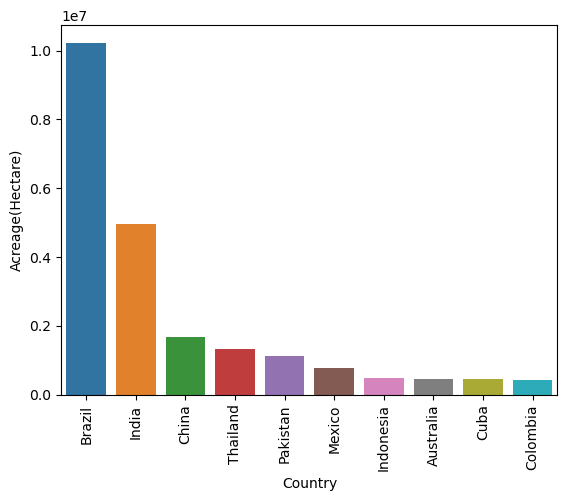

In [37]:
df_acr=df.sort_values("Acreage(Hectare)",ascending= False)
ax=sns.barplot(data=df_acr.head(10),x='Country',y="Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## Which country has highest yeild per hectare?

In [38]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


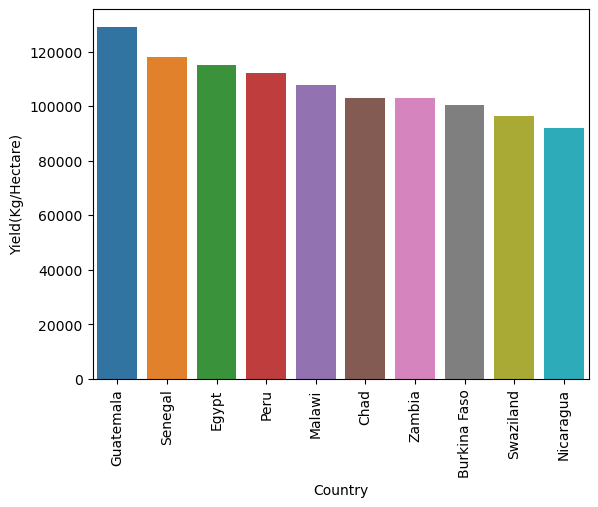

In [39]:
df_yield=df.sort_values("Yield(Kg/Hectare)",ascending=False)
ax=sns.barplot(data=df_yield.head(10),x="Country", y='Yield(Kg/Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## Which country has highest production

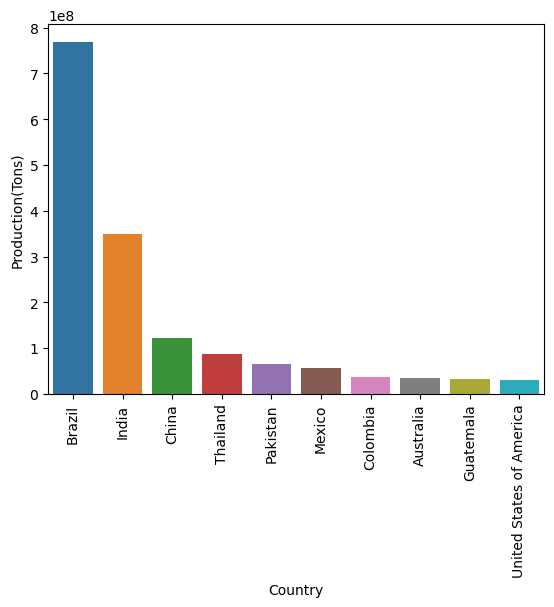

In [40]:
df_yield=df.sort_values("Production(Tons)",ascending=False)
ax=sns.barplot(data=df_yield.head(10),x="Country", y='Production(Tons)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## Correlation

In [41]:
df=df[["Country","Production(Tons)","Production_per_Person(Kg)","Acreage(Hectare)" ,"Yield(Kg/Hectare)"]].set_index("Country")

In [42]:
df.corr()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_Person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

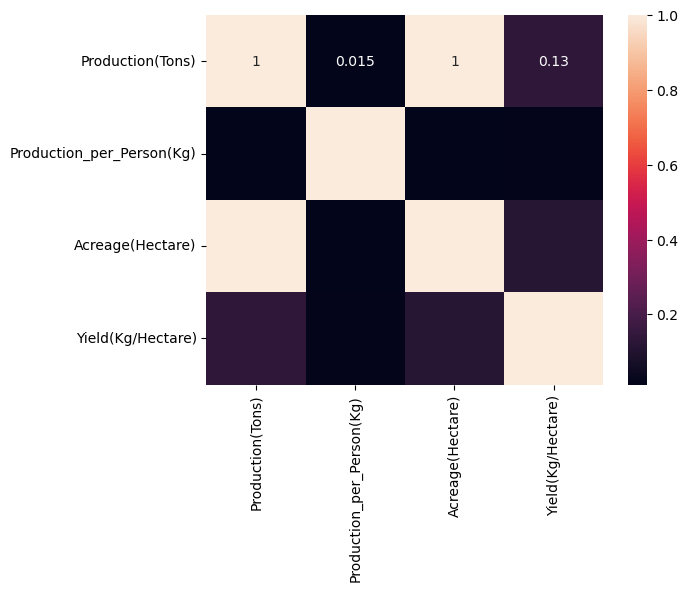

In [43]:
sns.heatmap(df.corr(),annot=True)

## Do countries with highest land produce more sugarcane

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

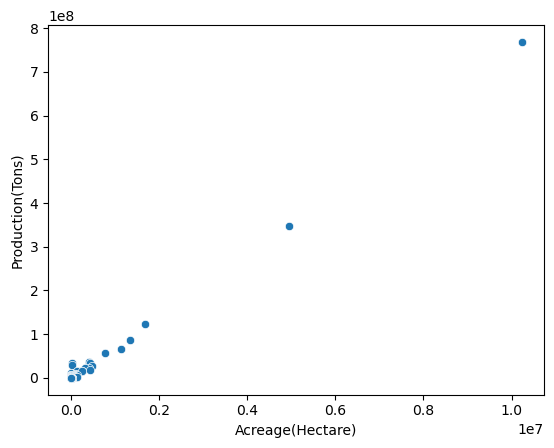

In [44]:
sns.scatterplot(data=df,x="Acreage(Hectare)",y="Production(Tons)")

## Do countries which yield more sugarcane per hectare produces more sugarcane in total

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

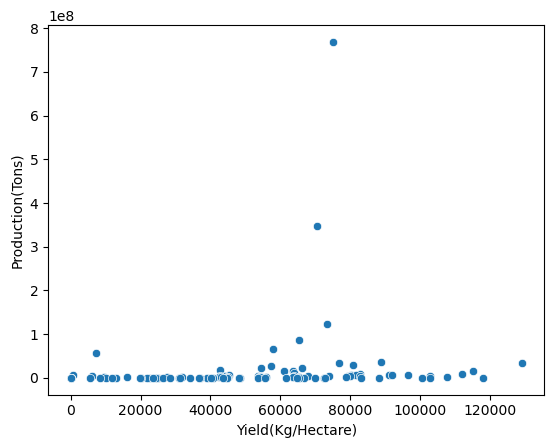

In [45]:
sns.scatterplot(data=df,x="Yield(Kg/Hectare)",y="Production(Tons)")